<a href="https://colab.research.google.com/github/IshwaryaSriram/EfficentNet-ImageClassification/blob/main/BrainTumor/skater_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Skater

In [ ]:
from skimage.segmentation import mark_boundaries

In [ ]:
pip install git+https://github.com/oracle/Skater.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oracle/Skater.git to /tmp/pip-req-build-b_vhcht1
  Running command git clone -q https://github.com/oracle/Skater.git /tmp/pip-req-build-b_vhcht1
     |████████████████████████████████| 275 kB 32.3 MB/s 
  Created wheel for skater: filename=skater-1.1.2b1-py3-none-any.whl size=4637019 sha256=98464ed30697f23087a6a0cba0af8f162070603f9d4094947eed4e89e54f1827
  Stored in directory: /tmp/pip-ephem-wheel-cache-nlmsbrdg/wheels/bc/e1/05/2b5d1c01d1e582236157f04b759d2e140ccc6703f599148c72
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=4d527b70eb77f9e30c87c1953f1ccbf87cfe1b82fa0848dae485581ed1f01f29
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built skater lime


In [ ]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import numpy as np
import keras
import os 
import glob
from keras.models import load_model
from keras import backend as K
from sklearn import metrics as m
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics as m
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
model= load_model('/drive/MyDrive/DLBrainTumor/model.h5')

In [ ]:
X_test = np.load('/drive/MyDrive/DLBrainTumor/X_test.npy')
y_test = np.load('/drive/MyDrive/DLBrainTumor/y_test.npy')

In [ ]:
X_train = np.load('/drive/MyDrive/DLBrainTumor/X_train.npy')
y_train = np.load('/drive/MyDrive/DLBrainTumor/y_train.npy')

In [ ]:
X_test = np.stack((X_test,)*3, axis=-1)

In [ ]:
X_train = np.stack((X_train,)*3, axis=-1)

Using a LimeImageExplainer to draw the lines of interpretability in the test images

In [ ]:
from skater.core.local_interpretation.lime.lime_image import LimeImageExplainer
from skater.model import InMemoryModel

In [ ]:
pip install scipy==1.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.3.8 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array
from scipy.misc import imresize, imsave

In [ ]:
def image_resizing(img_file):
    img_as_arry = img_to_array(img_file)
    resized = imresize(img_as_arry, (224, 224))
    an_img = resized.reshape((1,) + resized.shape)
    return an_img

Meningioma Tumor Sample MRI - the class is converted to bianry for skater interpretabilty

In [ ]:
from google.colab import files
upload_1 = files.upload()

Saving image(1).jpg to image(1).jpg


In [ ]:
!ls

'image(1).jpg'	 sample_data


In [ ]:
import cv2 

(1, 224, 224, 3)


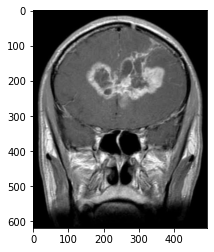

In [ ]:
img = cv2.imread('image(1).jpg')
plt.imshow(img)
# actual image
tumor_img_resized = image_resizing(img)
print(tumor_img_resized.shape) #tumor present

In [ ]:
def predict_prob(number):
  return [number[0],number[1]+number[2]+number[3]]

y_prob = np.array(list(map(predict_prob, model.predict(tumor_img_resized))))

In [ ]:
y_prob

array([[6.2622625e-05, 9.9993736e-01]], dtype=float32)

In [ ]:
y_pred = model.predict(tumor_img_resized)
np.argmax(y_pred)

2

In [ ]:
skater_model = InMemoryModel(model.predict)

2022-06-25 17:57:46,549 - skater.model.base - WARNING - No examples provided, cannot infer model type


In [ ]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(tumor_img_resized[0], skater_model.prediction_fn, batch_size=5, 
                                         top_labels=2, hide_color=0, num_samples=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

Interpretability shows the image and the mask applied to the image 

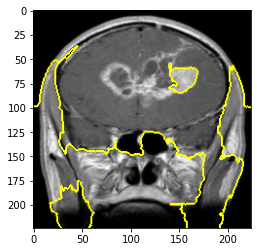

In [ ]:
temp2, mask2 = explanation.get_image_and_mask(label=1, positive_only=True,
                                            num_features=10000, hide_rest=False)

plt.imshow(mark_boundaries(temp2, mask2, mode='thick'))

Normal MRI Image

In [ ]:
from google.colab import files
upload_2 = files.upload()

Saving normal.jpg to normal.jpg


(1, 224, 224, 3)


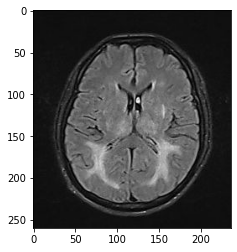

In [ ]:
img = cv2.imread('normal.jpg')
plt.imshow(img)
# actual image
tumor_img_resized = image_resizing(img)
print(tumor_img_resized.shape) #normal present

In [ ]:
y_prob = np.array(list(map(predict_prob, model.predict(tumor_img_resized))))
print(y_prob)
print(np.argmax(y_prob))

[[1.0000000e+00 1.6792779e-08]]
0


In [ ]:
explainer = LimeImageExplainer()
explanation_nomral = explainer.explain_instance(tumor_img_resized[0], skater_model.prediction_fn, batch_size=5, 
                                         top_labels=2, hide_color=0, num_samples=10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

The image and mask shows no tumor identification, as expected

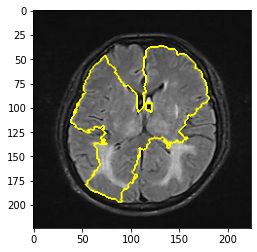

In [ ]:
temp1, mask1 = explanation_nomral.get_image_and_mask(label=0, positive_only=True,
                                            num_features=10000, hide_rest=False)

plt.imshow(mark_boundaries(temp1, mask1, mode='thick'))